### Question 1: Use User Data set and show the accuracy through the SVM model.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data1=pd.read_csv("D:/Letsupgrade_AIML/Datasets/User_Data_Arindam.csv")
data1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data1.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

### Gender is a categorical feature, so we have taken those categories into two different columns representing numerical value

In [8]:
# def addcolumn_male():
#     if data1['Gender']=='Male':
#         data1['Male']=1
#     else:
#         data1['Male']=0

# def addcolumn_female():
#     if data1['Gender']=='Female':
#         data1['Female']=1
#     else:
#         data1['Female']=0
        
# addcolumn_male()
# addcolumn_female()
# data1.head()
data1["Male"] = np.where(data1["Gender"] == "Male",1,0)
data1["Female"] = np.where(data1["Gender"] == "Female",1,0)
data1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male,Female
0,15624510,Male,19,19000,0,1,0
1,15810944,Male,35,20000,0,1,0
2,15668575,Female,26,43000,0,0,1
3,15603246,Female,27,57000,0,0,1
4,15804002,Male,19,76000,0,1,0


In [9]:
data1.corr()

,User ID,Age,EstimatedSalary,Purchased,Male,Female
User ID,1.000000,-0.000721,0.071097,0.007120,-0.025249,0.025249
Age,-0.000721,1.000000,0.155238,0.622454,-0.073741,0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,-0.060435,0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,-0.042469,0.042469
Male,-0.025249,-0.073741,-0.060435,-0.042469,1.000000,-1.000000
Female,0.025249,0.073741,0.060435,0.042469,-1.000000,1.000000


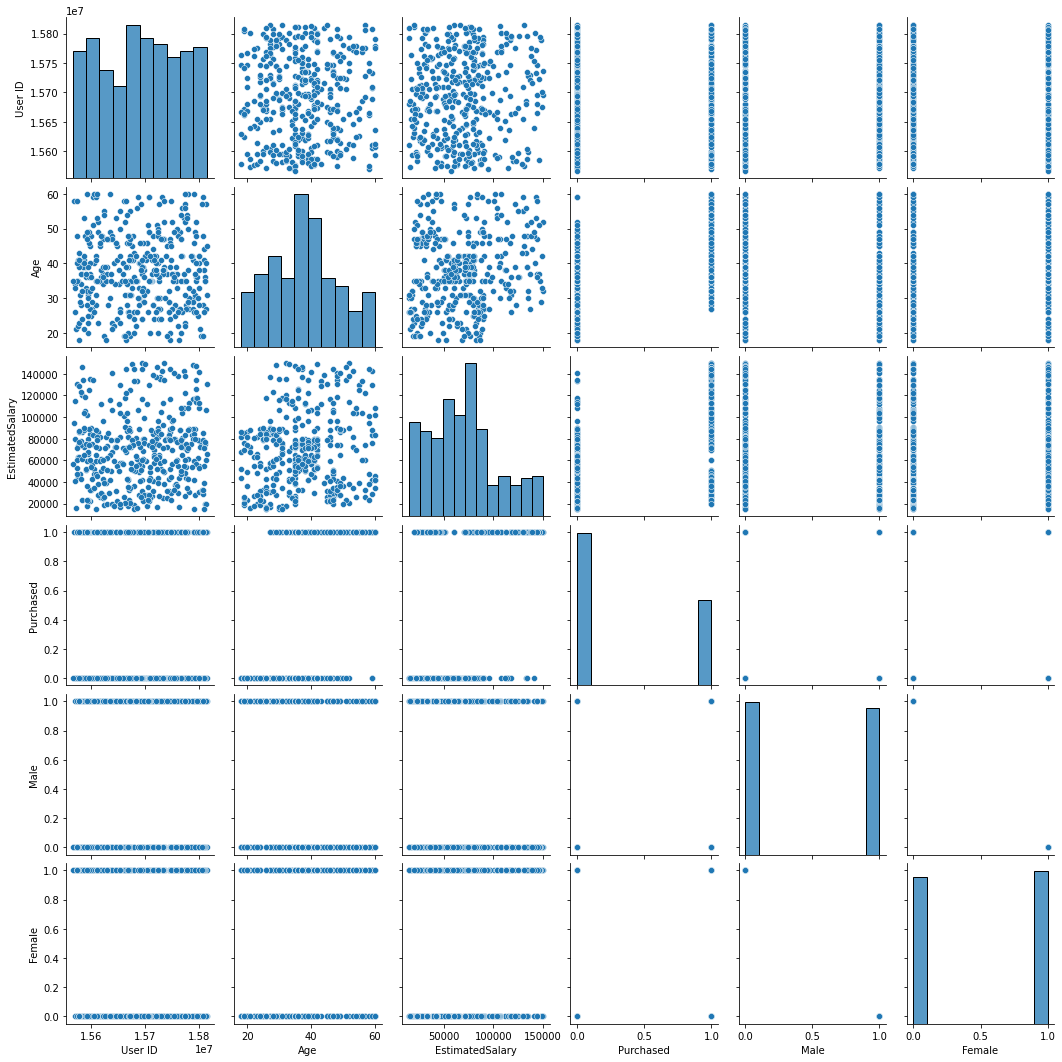

In [10]:
sns.pairplot(data1)

### Now we will remove the UserId and split the data to independent and dependent variables

In [11]:
data1.drop(columns=["User ID","Gender"],axis=1,inplace=True)
data1=pd.DataFrame(data1,columns=["Age","EstimatedSalary","Male","Female","Purchased"])
data1.head()

,Age,EstimatedSalary,Male,Female,Purchased
0,19,19000,1,0,0
1,35,20000,1,0,0
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,1,0,0


In [12]:
x=data1.iloc[:,0:4].values
y=data1.iloc[:,4].values
print(x.shape)
print(y.shape)

(400, 4)
(400,)


In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [15]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel='linear')

In [16]:
svc_classifier.fit(xtrain,ytrain)
ypred=svc_classifier.predict(xtest)

In [17]:
ypred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
# Accuracy Score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
accuracy=accuracy_score(ytest,ypred)*100
print("Accuracy score of User data using Support vector classifier is:",accuracy)

Accuracy score of User data using Support vector classifier is: 84.16666666666667


In [19]:
#confusion matrix
cm_svc=confusion_matrix(ytest,ypred)
print("Confusion matrix of user data using support vector classifier is:\n",cm_svc)

Confusion matrix of user data using support vector classifier is:
 [[72  1]
 [18 29]]


<AxesSubplot:>

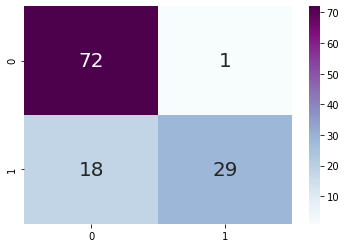

In [20]:
sns.heatmap(cm_svc,annot=True,annot_kws={'size':20},cmap="BuPu")

In [21]:
# classification report
report_linearsvc=classification_report(ytest,ypred)
print("Classification report of user data using support vector classifier with linear kernel is:\n",report_linearsvc)

Classification report of user data using support vector classifier with linear kernel is:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88        73
           1       0.97      0.62      0.75        47

    accuracy                           0.84       120
   macro avg       0.88      0.80      0.82       120
weighted avg       0.87      0.84      0.83       120



### Accuracy score of user data using support vector classifer using linear kernel is 84%

### Using RBF kernel

In [22]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel='rbf')
svc_classifier.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
ypred=svc_classifier.predict(xtest)

In [24]:
ypred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
print("Confusion matrix of SVC in radial basis function kernel(rbf) for iris dataset is:\n",confusion_matrix(ytest,ypred))

Confusion matrix of SVC in radial basis function kernel(rbf) for iris dataset is:
 [[69  4]
 [ 3 44]]


<AxesSubplot:>

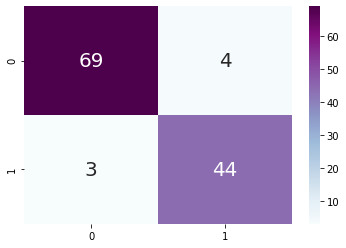

In [26]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,annot_kws={'size':20},cmap="BuPu")

In [27]:
report_rbf=classification_report(ytest,ypred)
print("Classification report of SVC in radial basis function kernel(rbf) for iris dataset is:\n",report_rbf)

Classification report of SVC in radial basis function kernel(rbf) for iris dataset is:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        73
           1       0.92      0.94      0.93        47

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [28]:
accuracy_score(ytest,ypred)*100

94.16666666666667

### Accuracy score of user data using support vector classifer using Radial Basis Function(RBF) kernel is 94%

### Using Polynomial Kernal

In [39]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel='poly',degree=3)
svc_classifier.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
ypred=svc_classifier.predict(xtest)

In [41]:
ypred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
print("Confusion matrix of SVC in radial basis function kernel(rbf) for iris dataset is:\n",confusion_matrix(ytest,ypred))

Confusion matrix of SVC in radial basis function kernel(rbf) for iris dataset is:
 [[72  1]
 [16 31]]


<AxesSubplot:>

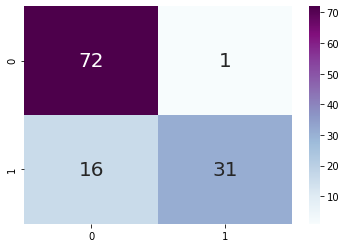

In [43]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,annot_kws={'size':20},cmap="BuPu")

In [44]:
report_poly=classification_report(ytest,ypred)
print("Classification report of SVC in polynomial kernel with degree 3 for iris dataset is:\n",report_poly)

Classification report of SVC in polynomial kernel with degree 3 for iris dataset is:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89        73
           1       0.97      0.66      0.78        47

    accuracy                           0.86       120
   macro avg       0.89      0.82      0.84       120
weighted avg       0.88      0.86      0.85       120



In [45]:
accuracy_score(ytest,ypred)*100

85.83333333333333

### Accuracy score of user data using support vector classifer using polynomial kernel with degree 3 is 85.83%